# Loading Image Data

지금까지는 상당히 인공적인 데이터만 가지고 했었습니다. 그대신 우리는 풀 사이즈 이미지를 가지고 해볼겁니다. 이 노트에서 이미지를 로드하고 뉴럴텟에 학습하는 법을 배우죠

We'll be using a [dataset of cat and dog photos](https://www.kaggle.com/c/dogs-vs-cats) available from Kaggle. Here are a couple example images:

<img src='assets/dog_cat.png'>

이 데이터는 냥이와 멍이를 구분하는 뉴럴 네트워크에 사용될 겁니다. 대단한건 아니지만 5년전만해도 졸라 어려웠슴

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper

`touchvision`에서 `datasets.ImageFolder` 함수를 가지고 로드하는게 제일 쉽습니다. ([documentation](http://pytorch.org/docs/master/torchvision/datasets.html#imagefolder))


```python
dataset = datasets.ImageFolder('path/to/data', transform=transform)
```

`'path/to/data'`는 데이터 폴더가 있는 파일 패쓰이고 `transform`은 `torchvision`의  [`transforms`](http://pytorch.org/docs/master/torchvision/transforms.html) 모듈에서 만든 processing step의 시퀀스입니다. 


```
root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```

where each class has it's own directory (`cat` and `dog`) for the images. The images are then labeled with the class taken from the directory name. So here, the image `123.png` would be loaded with the class label `cat`. You can download the dataset already structured like this [from here](https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip). I've also split it into a training set and test set.

### Transforms

`ImagaFolder`로 데이터를 로딩할때 너는 transform 몇개를 정의해야한다. 예를 들어, images는 서로다른 사이즈이지만 학습할때는 사이즈 맞춰줘야한다. `transforms.Resize()`로 resize하거나 `transforms.CenterCrop()`, `transforms.RandomResizedCrop()`으로 크롭하면 된다. 또한 `transforms.ToTensor()`를 가지고 텐서로 변환한다. 이 transform을 파이프라인으로 만들기 위해 `transforms.Compose()`를 씁니다. 

```python
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])

```

There are plenty of transforms available, I'll cover more in a bit and you can read through the [documentation](http://pytorch.org/docs/master/torchvision/transforms.html). 

### Data Loaders

`ImageFolder`로 로딩한 후에는 [`DataLoader`](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader)로 전달한다. `DataLoader`는 dataset을 가지고 이미지 배치와 레이블로 리턴한다. 배치 사이즈, 에폭 마다 데이터를 섞을지 등의 패러미터를 니가 정해야한다. 


```python
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
```

`dataloader`는 [generator](https://jeffknupp.com/blog/2013/04/07/improve-your-python-yield-and-generators-explained/).이다. 이 데이터를 끄집어내려면, iterator로 변환한다음 `next()`를 써야 한다. 


```python
# Looping through it, get a batch on each loop 
for images, labels in dataloader:
    pass

# Get one batch
images, labels = next(iter(dataloader))
```
 
>**Exercise:** Load images from the `Cat_Dog_data/train` folder, define a few transforms, then build the dataloader.

In [3]:
data_dir = 'Cat_Dog_data/Cat_Dog_data/train'

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])

dataset = datasets.ImageFolder(data_dir, transform=transform) #jpg파일이 든 디렉토리
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

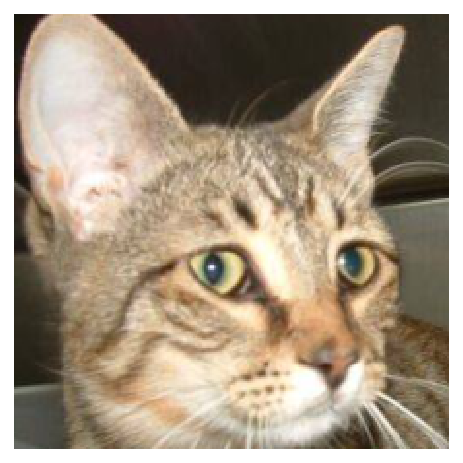

In [28]:
# Run this to test your data loader
images, labels = next(iter(dataloader))
helper.imshow(images[0], normalize=False)

If you loaded the data correctly, you should see something like this (your image will be different):

<img src='assets/cat_cropped.png' width=244>

## Data Augmentation

neural network을 학습시키기 위한 일반적인 방법은 인폿 데이터에 randomness를 주는 것이다. 예를 들어 random하게 회전시키거나, 뒤집거나, scale하거나, 자르는 것이다. 이는 네트워크가 일반화하는 데 도움을 줄 것이다. as it's seeing the same images but in different locations, with different sizes, in different orientations, etc.

랜덤하게 회전시키고, scale, crop하고, 뒤집는거는 transforms에서 이렇게 정의한다:

```python
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])
```

You'll also typically want to normalize images with `transforms.Normalize`. You pass in a list of means and list of standard deviations, then the color channels are normalized like so

또한 `transforms.Normalize`를 통해 이미지를 normalize할 수 있다. 

```input[channel] = (input[channel] - mean[channel]) / std[channel]```

Subtracting `mean` centers the data around zero and dividing by `std` squishes the values to be between -1 and 1. Normalizing helps keep the network weights near zero which in turn makes backpropagation more stable. Without normalization, networks will tend to fail to learn.

You can find a list of all [the available transforms here](http://pytorch.org/docs/0.3.0/torchvision/transforms.html). When you're testing however, you'll want to use images that aren't altered other than normalizing. So, for validation/test images, you'll typically just resize and crop.

>**Exercise:** Define transforms for training data and testing data below. Leave off normalization for now.

In [30]:
data_dir = 'Cat_Dog_data/Cat_Dog_data'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()]) 

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

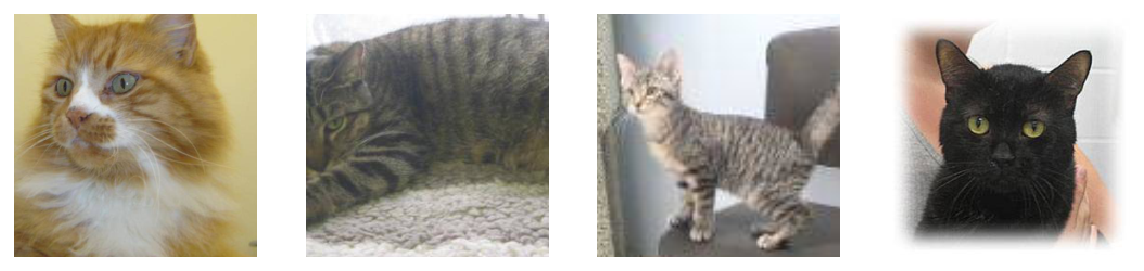

In [32]:
# change this to the trainloader or testloader 
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

Your transformed images should look something like this.

<center>Training examples:</center>
<img src='assets/train_examples.png' width=500px>

<center>Testing examples:</center>
<img src='assets/test_examples.png' width=500px>

이제 당신은 데이터를 로드할 수 있다. 그리고 네트워크를 만들어서 분류하면된다. 앞서 한 것보다 더 복잡할 수 있다. 솔직히 얘기하자면 you probably won't get it to work with a fully-connected network, no matter how deep. These images have three color channels and at a higher resolution (so far you've seen 28x28 images which are tiny).

다음 파트에서는, pre-trained 네트워크를 사용하는 법을 알려주겠다 In the next part, I'll show you how to use a pre-trained network to build a model that can actually solve this problem.

In [6]:
# Optional TODO: Attempt to build a network to classify cats vs dogs from this dataset